# Data Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from random import seed
from random import randint

In [3]:
input_path = 'suicide_data.csv'
df = pd.read_csv(input_path)
df.head()

,case_id,age_group,age,gender,profession_group,religion,district,division,latitude,longitude,...,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather,weather_description
0,1,youth,22,male,worker,muslim,Brahmanbaria,Chattagram,23.964142,91.118301,...,302.86,299.15,299.15,1008,83,2.10,320,40,Haze,haze
1,2,youth,20,male,NaN,muslim,Sylhet,Sylhet,24.894930,91.868706,...,299.17,295.57,295.57,1012,96,1.39,116,33,Clouds,scattered clouds
2,3,teen,14,female,student,muslim,Manikganj,Dhaka,23.861650,90.000320,...,304.33,301.15,301.15,1004,78,3.60,190,75,Drizzle,drizzle
3,4,NaN,NaN,female,student,muslim,Bogura,Rajshahi,24.850980,89.371080,...,303.67,299.34,299.34,1003,91,2.64,186,100,Rain,moderate rain
4,5,teen,18,female,student,muslim,Dhaka,Dhaka,23.810331,90.412521,...,304.49,300.15,300.15,1004,83,1.99,154,40,Haze,haze


# Check Unique column Check (Skip this)


In [4]:
for colum in df.columns.tolist():
    print(f'colum {colum}')
    data_frame = df.groupby([colum]).size().reset_index(name='count')
    # df_the_dict = pd.DataFrame(data_frame) 
    # df_the_dict.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Data modification/code/data/{colum}.csv') 
    print(data_frame)
    print("-----------------------------------------------")

colum case_id
     case_id  count
0          1      1
1          2      1
2          3      1
3          4      1
4          5      1
..       ...    ...
754      755      1
755      756      1
756      757      1
757      758      1
758      759      1

[759 rows x 2 columns]
-----------------------------------------------
colum age_group
     age_group  count
0        adult     70
1  middle-aged     74
2          old     27
3         teen    247
4        youth    231
-----------------------------------------------
colum age
     age  count
0     10      4
1     11      4
2     12     11
3     13     24
4     14     30
5     15     29
6     16     35
7     17     34
8     18     45
9     19     27
10    20     46
11    21     12
12    22     44
13    23     16
14    24     10
15    25     29
16    26     17
17    27     18
18    28     18
19    30     21
20    31      2
21    32     14
22    33      1
23    34      1
24    35     25
25    36      2
26    37      3
27    38      6
28  

# Ploting

In [5]:
plt.rcParams['figure.figsize'] = (20,8)

def plot_graph(col_name, x, y):
    plt.bar(x, y)
    plt.xlabel(f'{col_name}', labelpad=20)
    plt.ylabel("No. of suicide case", labelpad=20)
    print(f'Bar plot for : {col_name}')
    plt.show()
    print('\n\n\n')

Bar plot for : reason


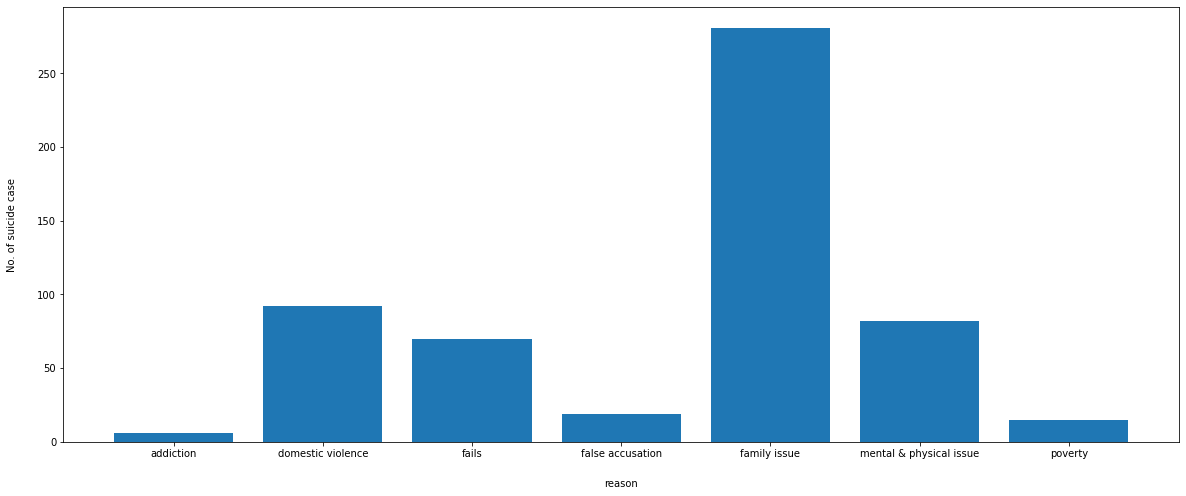





Bar plot for : method


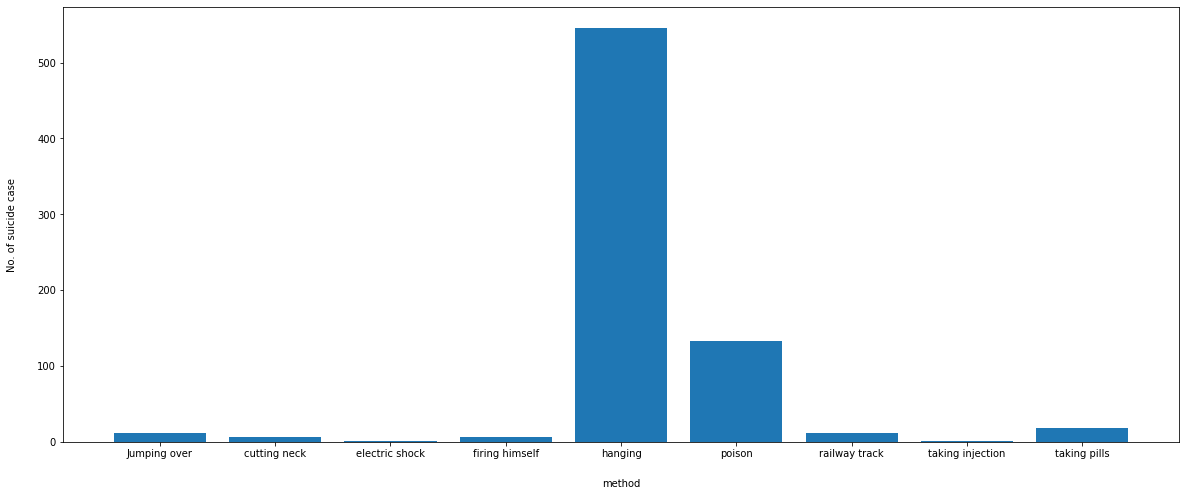





Bar plot for : economic_condition


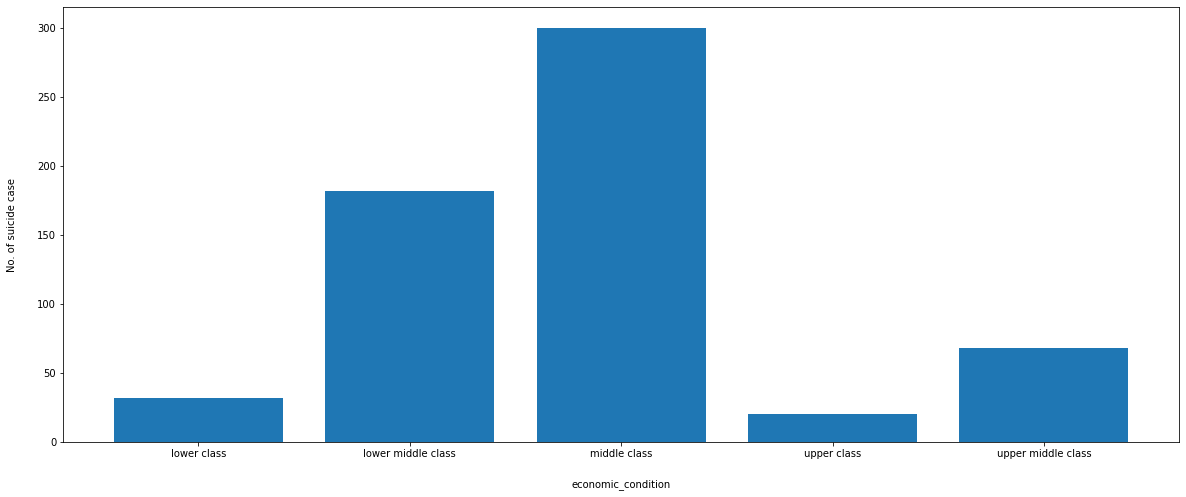





Bar plot for : age_group


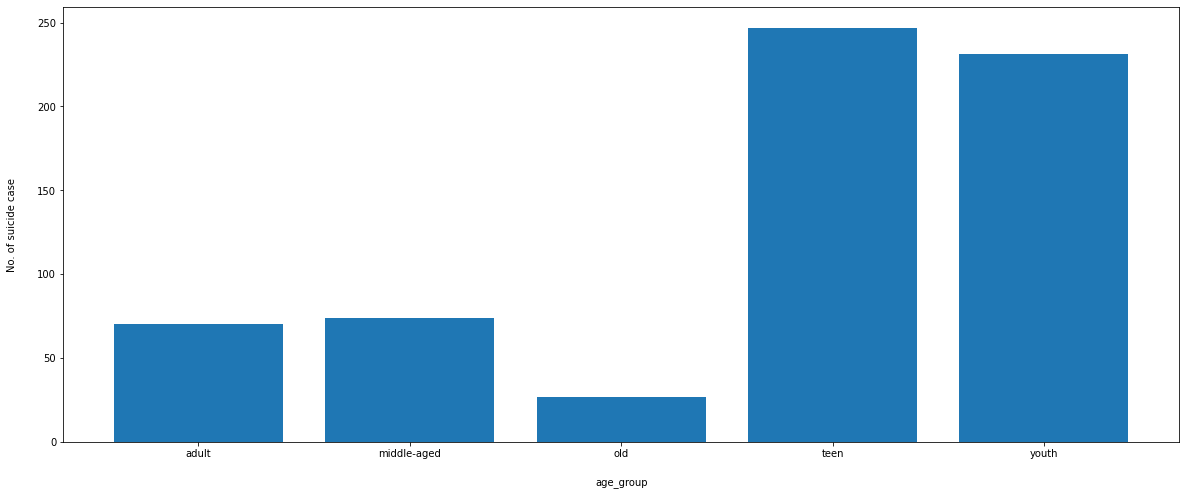





Bar plot for : gender


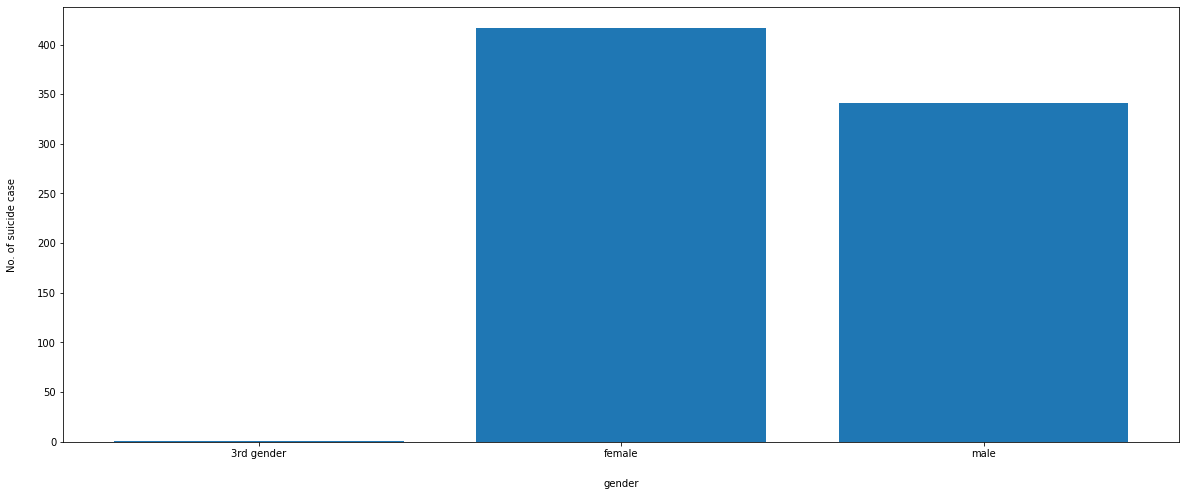





Bar plot for : area


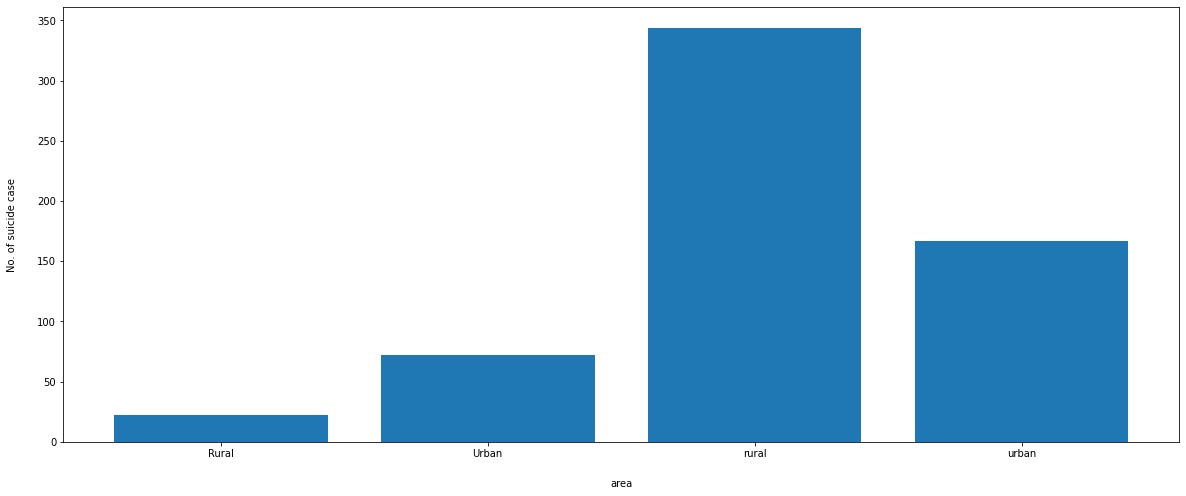





Bar plot for : division


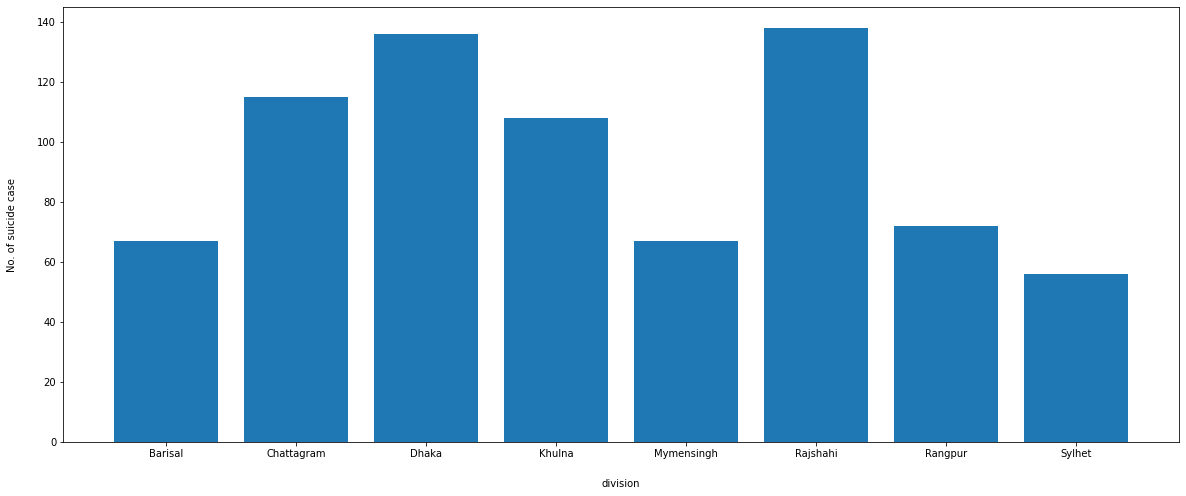





Bar plot for : religion


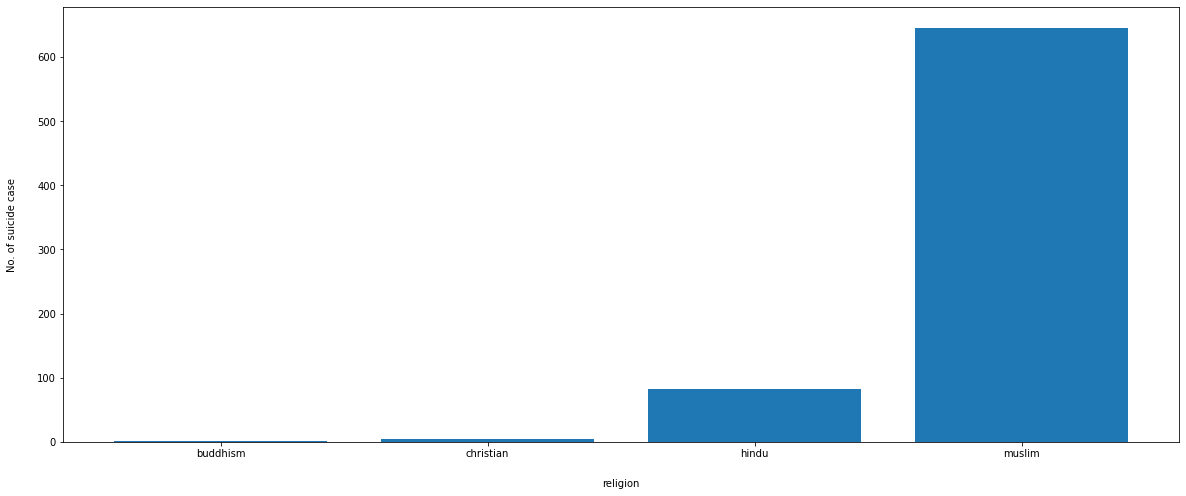





Bar plot for : time


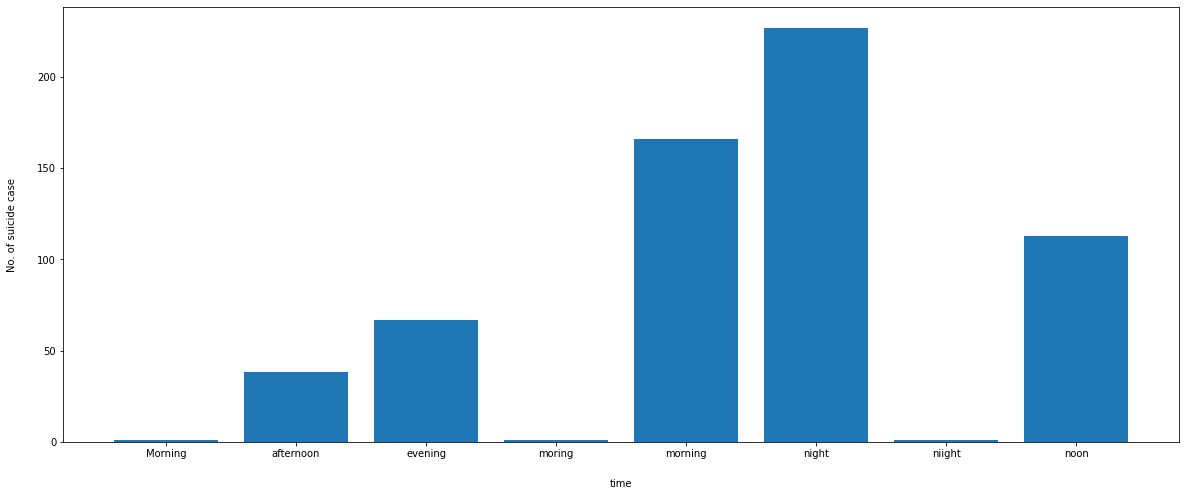





Bar plot for : weather


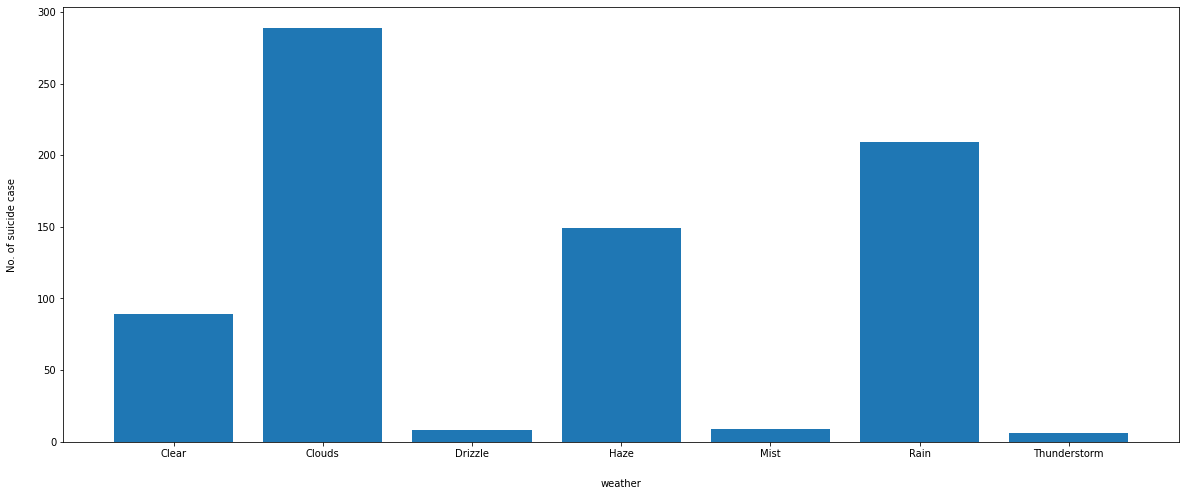

In [11]:
# main data column
list_ploting_col = ['reason', 'method', 'economic_condition', 'age_group', 'gender', 'area', 'division', 'religion' , 'time', 'weather']
for column in list_ploting_col:
    data_frame = df.groupby([column]).size().reset_index(name='count')
    x_list, y_list = data_frame[f'{column}'][:].tolist(), data_frame['count'][:].tolist()
    plot_graph(column, x_list, y_list) 

## Suicide months

Bar plot for : Month


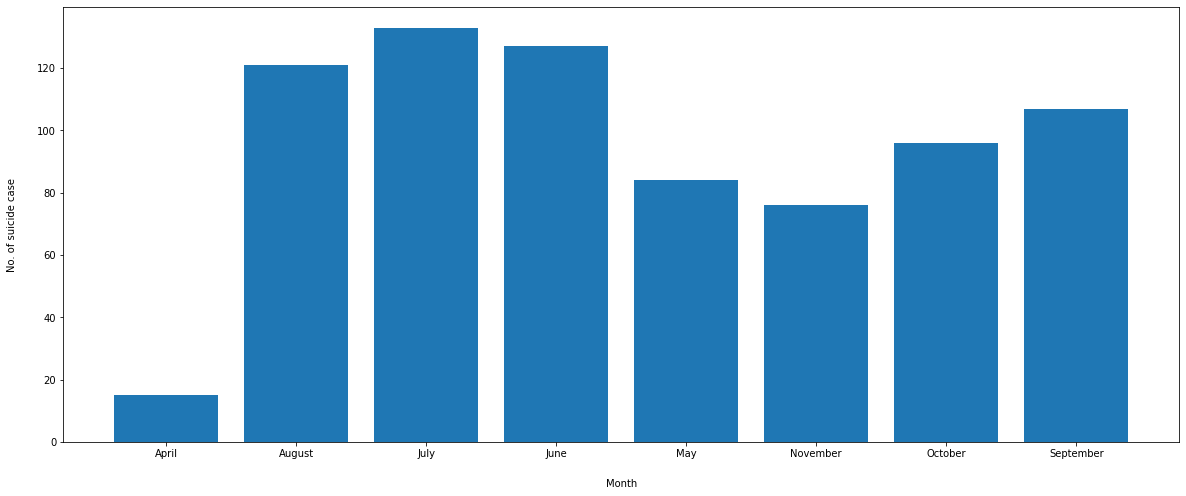

In [12]:
l = len(df)
all_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December",]
month_list = []
# get the date and split the month
for i in range(0, l):
    the_date = df['suicide_date'][i].split("/")
    month_list.append(all_month[int(the_date[1])-1])

month_map = {'month':month_list}
month = pd.DataFrame.from_dict(month_map)

suicide_date = month.groupby(['month']).size().reset_index(name='count')
x_list, y_list = suicide_date['month'][:].tolist(), suicide_date['count'][:].tolist()
plot_graph('Month', x_list, y_list)

## Profession group

Bar plot for : Profession group


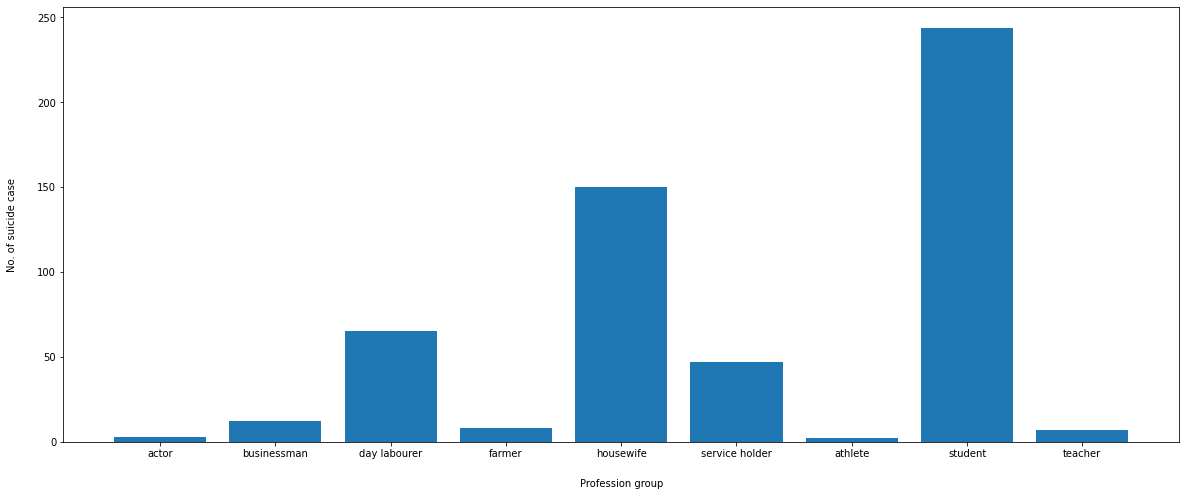

In [14]:
profession = df.groupby(['profession_group']).size().reset_index(name='count')
profession_group = {'actor': 0, 'businessman': 0, 'day labourer': 0, 'farmer': 0, 'housewife': 0, 'service holder': 0, 'athlete': 0, 'student': 0, 'teacher': 0}

p_len = len(profession)
for i in range(0, p_len):
    if profession['profession_group'][i] in ['actor', 'musician', 'saint']:
        profession_group['actor'] += profession['count'][i]

    if profession['profession_group'][i] == 'businessman':
        profession_group['businessman'] += profession['count'][i]
    
    if profession['profession_group'][i] in ['day laborer', 'day labourer', 'day-laborer', 'worker']:
        profession_group['day labourer'] += profession['count'][i]
    
    if profession['profession_group'][i] == 'farmer':
        profession_group['farmer'] += profession['count'][i]

    if profession['profession_group'][i] in ['housewife', 'houswife']:
        profession_group['housewife'] += profession['count'][i]

    if profession['profession_group'][i] in ['doctor', 'engineer', 'gambler', 'service holder']:
        profession_group['service holder'] += profession['count'][i]
    
    if profession['profession_group'][i] in ['spotsman', 'stportsman']:
        profession_group['athlete'] += profession['count'][i]
    
    if profession['profession_group'][i] == 'student':
        profession_group['student'] += profession['count'][i]
    
    if profession['profession_group'][i] == 'teacher':
        profession_group['teacher'] += profession['count'][i]
plot_graph("Profession group", profession_group.keys(), profession_group.values())